<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Создание-тренировочной-и-тестовой-выборки" data-toc-modified-id="Создание-тренировочной-и-тестовой-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создание тренировочной и тестовой выборки</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-каждого-металла-на-всех-этапах" data-toc-modified-id="Концентрация-каждого-металла-на-всех-этапах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Концентрация каждого металла на всех этапах</a></span></li><li><span><a href="#Распределние-гранул-сырья" data-toc-modified-id="Распределние-гранул-сырья-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределние гранул сырья</a></span></li><li><span><a href="#Исследование-концентрации-всех-веществ" data-toc-modified-id="Исследование-концентрации-всех-веществ-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование концентрации всех веществ</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#GradientBoosting" data-toc-modified-id="GradientBoosting-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>GradientBoosting</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Загрузка данных

Подключим необходимые нам библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from datetime import date
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor

Прочитаем тренировочный датасет в переменную tr, тестовый в ts и исходный в fl. Укажем, что столбец "date" нужно перевести в тип datetime и сделать его индексами.

In [2]:
tr = pd.read_csv('D://Yandex Project\prefabricated project2/gold_recovery_train_new.csv', parse_dates=['date'], dayfirst=True,index_col='date')
ts = pd.read_csv('D://Yandex Project\prefabricated project2/gold_recovery_test_new.csv', parse_dates=['date'], dayfirst=True,index_col='date')
fl = pd.read_csv('D://Yandex Project\prefabricated project2/gold_recovery_full_new.csv', parse_dates=['date'], dayfirst=True,index_col='date')

Напишем функцию для вычисления эффективности обогащения

## Подготовка данных

In [3]:
def recovery(C, F, T):
    
    numerator = (C*(F-T))
    divider =(F*(C-T))
    
    rec = (numerator / divider) * 100
    
    # так как мы не застрахованы от очень больших и очень маленьких значений, то заполним их
    rec[rec<0] = np.nan
    rec[rec>100] = np.nan
    return rec

### Работа с пропусками

In [4]:
t,f,c =tr['rougher.output.tail_au'], tr['rougher.input.feed_au'], tr['rougher.output.concentrate_au']
rec = recovery(c, f, t)
print("Совпадающих значений:", sum(abs(tr['rougher.output.recovery'] - rec) < 10**(-4)))
print("Среднее:", rec.mean())
print("MAE:", mean_absolute_error(tr['rougher.output.recovery'].dropna(),
                                                                  rec.dropna()))
print("--------------------------")
print("Пропуски в расчете:", rec.isna().sum())
print("Пропуски в full DataFrame:", tr['rougher.output.recovery'].isna().sum())

Совпадающих значений: 14149
Среднее: 82.70450164550269
MAE: 9.73512347450521e-15
--------------------------
Пропуски в расчете: 0
Пропуски в full DataFrame: 0


Совпадающих значений столько же сколько и всего значений в датасете, значит recovery исходное рассчитано верно. МАЕ очень близко к нулю.

Посчитаем процент пропущенных значений в разных столбцах

In [5]:
mas = []
for i in fl.columns:
    mas.append(((fl[i].isna().sum())/(fl[i].count())))
print(f'Максимальный процент пропусков: {max(mas)*100} %')

Максимальный процент пропусков: 9.880730314849357 %


Менее 10 процентов, значит их можно удалить, но мы заполним предыдущими значениями.

In [6]:
tr = tr.fillna(method = 'ffill')
ts = ts.fillna(method = 'ffill')
fl = fl.fillna(method = 'ffill')

Далее посмотрим на тестовый датасет

In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

Как видно, в тесте как раз нет  признаков  с пометкой "output" которые необходимо предсказывать.

Для того чтобы верно предсказывать все значения на тесте, необходимо чтобы количество предикторов в тренировочной выборке и тестовой совпадало, иначе информация будет неполная и на тесте модель ошибётся.

### Создание тренировочной и тестовой выборки 

Создадим переменную X, в которую заппишем только те столбцы, которые совпадают со столбцами в тесте, далее создадим Y, в  который запишем 'rougher.output.recovery' и 'final.output.recovery'. Далее разделим X и Y на тестовые и тренировочные датасеты.

In [8]:
mas1 = []
mas2 = []
for i in range(len(fl.columns)):
    mas1.append(fl.columns[i])
    if "final" in mas1[i] or "output" in mas1[i] or "calculation" in mas1[i]:
        mas2.append(mas1[i])
        #print(mas2[i])
X = fl.drop(mas2,axis = 1)
Y = fl[['rougher.output.recovery','final.output.recovery']]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=42,shuffle = True)
y_train_rougher = y_train['rougher.output.recovery']
y_test_rougher = y_test['rougher.output.recovery']
y_train_final = y_train['final.output.recovery']
y_test_final = y_test['final.output.recovery']

## Исследовательский анализ данных

### Концентрация каждого металла на всех этапах

Теперь найдём концентрацию каждого металла на всех этапах. Для этого найдём среднее значение концентрации каждого из металлов на всех этапах и построим график

In [9]:
mas = ['input','rougher','primary','finally']
au = [fl['rougher.input.feed_au'].mean(), fl['rougher.output.concentrate_au'].mean(),
     fl['primary_cleaner.output.concentrate_au'].mean(), fl['final.output.concentrate_au'].mean()]
ag = [fl['rougher.input.feed_ag'].mean(), fl['rougher.output.concentrate_ag'].mean(),
     fl['primary_cleaner.output.concentrate_ag'].mean(), fl['final.output.concentrate_ag'].mean()]
pb = [fl['rougher.input.feed_pb'].mean(), fl['rougher.output.concentrate_pb'].mean(),
     fl['primary_cleaner.output.concentrate_pb'].mean(), fl['final.output.concentrate_pb'].mean()]

Прямой отмечена концентрация золота, прерывистой линией отмечена концентрация серебра, точками отмечена концентрация свинца

Text(0, 0.5, 'Концентрация металла')

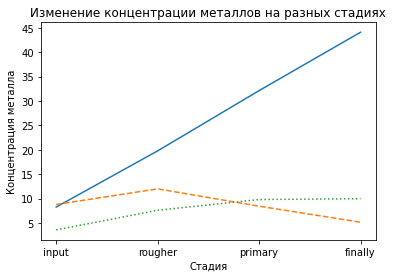

In [10]:
plt.plot(mas,au,'-',mas,ag,'--',mas,pb,':')
plt.title('Изменение концентрации металлов на разных стадиях')
plt.xlabel('Стадия')
plt.ylabel('Концентрация металла')

Как видно, происходит то что нам и нужно. Концентрация золота с каждым этапом очистки стабильно увеличивается, концентрация серебра уменьшается, а концентрация свинца незначительно увеличивается.

Теперь посмотрим на распределение гранул сырья на обучающей и тестовой выборке. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

### Распределние гранул сырья

Обучающая:

Text(0, 0.5, 'Частота')

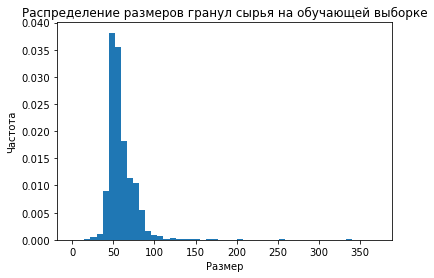

In [11]:
plt.hist(tr['rougher.input.feed_size'],range = (0,370),density=True, bins = 50)
plt.title('Распределение размеров гранул сырья на обучающей выборке')
plt.xlabel('Размер')
plt.ylabel('Частота')

Тестовая:

Text(0, 0.5, 'Частота')

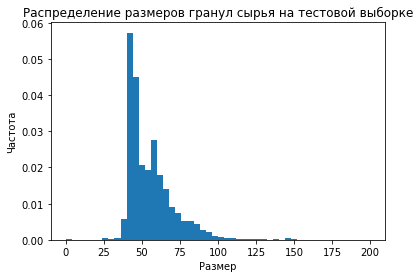

In [12]:
plt.hist(ts['rougher.input.feed_size'],range = (0,200),density=True,bins = 50)
plt.title('Распределение размеров гранул сырья на тестовой выборке')
plt.xlabel('Размер')
plt.ylabel('Частота')

Обучающая и тестовая на одном графике:

Text(0.5, 1.0, 'Распределение размеров гранул сырья на тестовой и обучающей выборках на одном графике ')

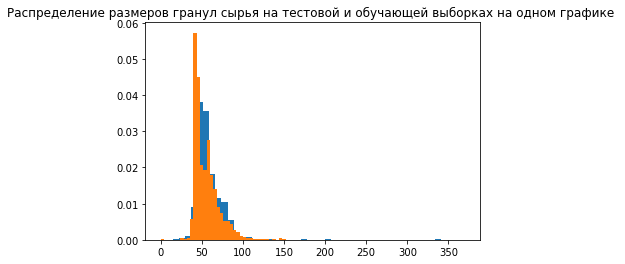

In [13]:
plt.hist(tr['rougher.input.feed_size'],range = (0,370),density=True, bins = 50)
plt.hist(ts['rougher.input.feed_size'],range = (0,200),density=True, bins = 50)
plt.title('Распределение размеров гранул сырья на тестовой и обучающей выборках на одном графике ')

Как мы видим, распределения похожи, поэтому можно обучать модель.

### Исследование концентрации всех веществ

Теперь исследуем суммарную концентрацию всех веществ на каждом этапе. 

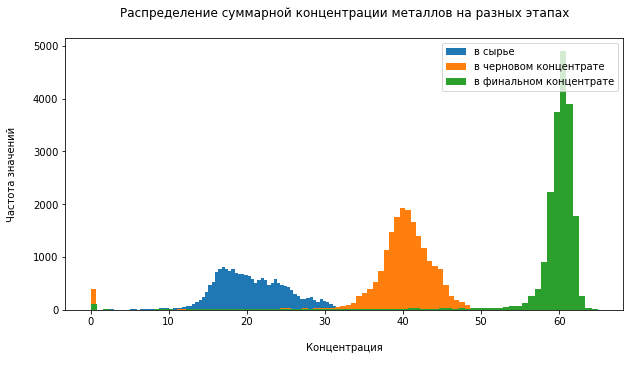

In [14]:
fl['final_output_metals'] = (fl['final.output.concentrate_ag']
                            + fl['final.output.concentrate_au']
                            + fl['final.output.concentrate_pb'])
                             
fl['rougher_input_metals'] = (fl['rougher.input.feed_au']
                            + fl['rougher.input.feed_pb']
                            + fl['rougher.input.feed_ag'])
                              
fl['rougher_output_metals'] = (fl['rougher.output.concentrate_ag']
                            + fl['rougher.output.concentrate_pb']
                            + fl['rougher.output.concentrate_au'])


plt.figure(figsize=(10,5))
plot1 = fl['rougher_input_metals'].plot(kind='hist', bins=80, label='в сырье')
plot2 = fl['rougher_output_metals'].plot(kind='hist', bins=80, label='в черновом концентрате')
plot3 = fl['final_output_metals'].plot(kind='hist', bins=80, label='в финальном концентрате')
plt.title('Распределение суммарной концентрации металлов на разных этапах'+'\n')
plt.xlabel('\n' + 'Концентрация'+'\n')
plt.ylabel('Частота значений'+'\n')
plt.legend(loc='upper right')
plt.show()

Как мы видим,есть выбросы. Их необходимо удалить

In [15]:
fl = fl.query('rougher_input_metals>10')
fl = fl.query('final_output_metals>50')
fl = fl.query('rougher_output_metals >30')

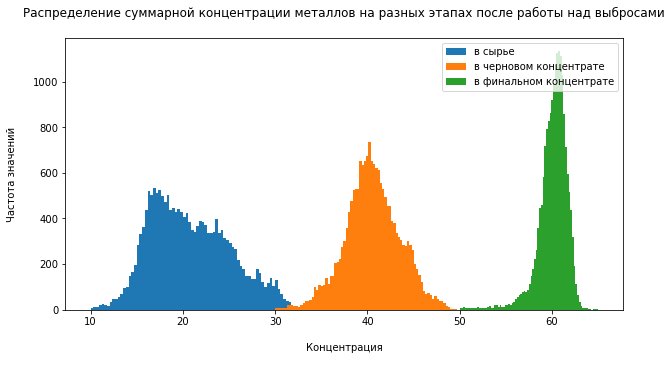

In [16]:
plt.figure(figsize=(10,5))
plot1 = fl['rougher_input_metals'].plot(kind='hist', bins=80, label='в сырье')
plot2 = fl['rougher_output_metals'].plot(kind='hist', bins=80, label='в черновом концентрате')
plot3 = fl['final_output_metals'].plot(kind='hist', bins=80, label='в финальном концентрате')
plt.title('Распределение суммарной концентрации металлов на разных этапах после работы над выбросами'+'\n')
plt.xlabel('\n' + 'Концентрация'+'\n')
plt.ylabel('Частота значений'+'\n')
plt.legend(loc='upper right')
plt.show()

## Обучение модели

Создадим функцию для расчёта sMAPE

In [17]:
def smape(target, predictions):
    numerator = abs(predictions - target)
    divider = (abs(target) + abs(predictions)) / 2
    summa = (numerator / divider).sum()

    smape = (1 / len(target)) * summa * 100
    return smape
smape_scorer = make_scorer(smape, greater_is_better=False)

И функцию для итогового расчёта финальной sMAPE

In [18]:
def smapefinal(rougher, final):
    smape_final_1 = 0.25 * rougher + 0.75 * final
    return smape_final_1

Стандартизируем X

In [19]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Напишем функцию для оценки лучших гиперпараметров модели на кросс-валидации.

In [21]:
def GridSearch (est,params,X_train,y_train):
    grid_search_cv_est = GridSearchCV(est,params,cv = 5,scoring=smape_scorer)
    grid_search_cv_est.fit(X_train,y_train)
    best_param = grid_search_cv_est.best_params_
    best_est_est = grid_search_cv_est.best_estimator_
    return best_est_est,best_param

In [22]:
def RandomizedSearch (est,params,X_train,y_train):
    randomized_search_cv_est = RandomizedSearchCV(est,params,cv = 5,scoring=smape_scorer)
    randomized_search_cv_est.fit(X_train,y_train)
    best_param = randomized_search_cv_est.best_params_
    best_est_est = randomized_search_cv_est.best_estimator_
    return best_est_est,best_param

### LinearRegression

Создадим модель линейной регрессии

In [23]:
clf = LinearRegression()
params = {'fit_intercept':['False','True'],
         'normalize':['False','True'],
         'positive':['False','True']}

Обучим её на кросс-валидации на X_train и y_train_rougher

In [24]:
best_clf1,best_param = RandomizedSearch(clf,params,X_train,y_train_rougher)
print(best_param)

{'positive': 'False', 'normalize': 'False', 'fit_intercept': 'False'}


Предскажем значения для этапа rougher

In [25]:
prediction_values_rougher = best_clf1.predict(X_train)

Сделаем тоже самое для y_train_final

In [26]:
best_clf2,best_param = GridSearch(clf,params,X_train,y_train_final)
print(best_param)

{'fit_intercept': 'False', 'normalize': 'False', 'positive': 'False'}


In [27]:
prediction_values_final = best_clf2.predict(X_train)

Найдём sMAPE для final и rougher

In [28]:
lin_rougher = smape(y_train_rougher,prediction_values_rougher)

In [29]:
lin_final = smape(y_train_final,prediction_values_final)

Найдём итоговое sMAPE для линейной регрессии

In [30]:
print(smapefinal(lin_rougher,lin_final))

9.355550593303427


### RandomForestRegressor

Проведём те-же действия и для RandomForestRegressor

In [31]:
clf = RandomForestRegressor(random_state = 42)
params = {'n_estimators':range(1,5),
         'max_depth':range(1,10),
         'min_samples_leaf':range(1,3)}

In [32]:
best_clf1,best_param = RandomizedSearch(clf,params,X_train,y_train_rougher)
print(best_param)

{'n_estimators': 3, 'min_samples_leaf': 2, 'max_depth': 9}


In [33]:
prediction_values_rougher = best_clf1.predict(X_train)

In [34]:
best_clf2,best_param = RandomizedSearch(clf,params,X_train,y_train_final)
print(best_param)

{'n_estimators': 4, 'min_samples_leaf': 2, 'max_depth': 9}


In [35]:
prediction_values_final = best_clf2.predict(X_train)

In [36]:
rgr_rougher = smape(y_train_rougher,prediction_values_rougher)

In [37]:
rfr_final = smape(y_train_final,prediction_values_final)

In [38]:
print(smapefinal(rgr_rougher,rfr_final))

7.215623604821639


### DecisionTreeRegressor

In [39]:
clf = DecisionTreeRegressor(random_state = 42)
params = {'max_depth':range(1,15),
         'min_samples_leaf':range(1,2)}

In [40]:
best_clf1,best_param = RandomizedSearch(clf,params,X_train,y_train_rougher)
print(best_param)

{'min_samples_leaf': 1, 'max_depth': 13}


In [41]:
prediction_values_rougher = best_clf1.predict(X_train)

In [42]:
best_clf2,best_param = RandomizedSearch(clf,params,X_train,y_train_final)
print(best_param)

{'min_samples_leaf': 1, 'max_depth': 7}


In [43]:
prediction_values_final = best_clf2.predict(X_train)

In [44]:
dtr_rougher = smape(y_train_rougher,prediction_values_rougher)

In [45]:
dtr_final = smape(y_train_final,prediction_values_final)

In [46]:
print(smapefinal(dtr_rougher,dtr_final))

6.578133298499866


### GradientBoosting

In [47]:
cat = CatBoostRegressor(random_state = 42,loss_function = "RMSE",depth = 4,learning_rate = 0.1,verbose = False)
params = {}

In [48]:
best_clf1,best_param = RandomizedSearch(cat,params,X_train,y_train_rougher);

In [49]:
prediction_values_rougher = best_clf1.predict(X_train)

In [50]:
best_clf2,best_param = RandomizedSearch(cat,params,X_train,y_train_final,);

In [51]:
prediction_values_final = best_clf2.predict(X_train)

In [52]:
cat_rougher = smape(y_train_rougher,prediction_values_rougher)

In [53]:
cat_final = smape(y_train_final,prediction_values_final)

In [54]:
print(smapefinal(cat_rougher,cat_final))

6.1115173996664


Как видно, самая лучшая модель это CatBoost

## Тестирование модели

Предскажем значения y_test и посмотрим на получившиеся метрики

In [55]:
prediction_values_rougher = best_clf1.predict(X_test)
prediction_values_final = best_clf2.predict(X_test)
cat_rougher = smape(y_test_rougher,prediction_values_rougher)
cat_final = smape(y_test_final,prediction_values_final)
print(smapefinal(cat_rougher,cat_final))

7.486632469905149


Как и ожидалось, CatBoost оказалась самой лучшей моделью

### Проверка на адекватность

Сравним с дефолтной моделью

In [56]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train_rougher)
prediction_values_rougher = dummy_regr.predict(X_train)
dummy_regr.fit(X_train, y_train_final)
prediction_values_final = dummy_regr.predict(X_train)
dum_rougher = smape(y_train_rougher,prediction_values_rougher)
dum_final = smape(y_train_final,prediction_values_final)
print(smapefinal(dum_rougher,dum_final))

10.784680731461112


Получившаяся наша метрика близка, но ниже дефолтной модели, значит наша модель адекватна и имеет смысл

Вывод: Как видно, лучшие результаты показывает решающий лес так как там самый минимальный процент ошибок. 

## Общий вывод

Общий вывод:

1) Произвели исследовательский анализ данных, проверили наличие пропусков, дубликатов. В тестовой выборке не оказалось признаков, которые обозначают характеристики смеси на разных этапах обработки.

2) Обнаружили, что концентрация золота и меди увеличивается с каждым этапом, а концентрация серебра снижается после флотации.

3) Распределения размеров гранул в train и test выборках одинаковы.

4) Суммарные распределения концентрации скошены влево, а также имеют множество нулевых значений. Избавились от выбросов.

5) Построили различные модели, выявили что лучшей моделью является CatBoost, с помощью него получили лучшее значение sMAPE = 7.48